In [1]:
from matplotlib import pyplot as plt 
%matplotlib inline
import glob
import cv2
import numpy as np
from collections import Counter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

In [2]:
dataset_path="./python/images_background/"
languages = [path.split("/")[-1] for path in glob.glob(dataset_path+"*")]

In [3]:
all_alphabets = {language:[cv2.cvtColor(cv2.imread(image),cv2.COLOR_RGB2GRAY) for image in glob.glob(dataset_path+language+"/*/*")]\
                                                                       for language in languages }

In [4]:
lengthes = np.cumsum([len(all_alphabets[key]) for key in all_alphabets])  

In [5]:
all_images =  np.vstack([np.array(all_alphabets[key]) for key in all_alphabets])

In [6]:
all_images.shape

(19280, 105, 105)

In [7]:
def generator(features,batch_size):
 
    # Create empty arrays to contain batch of features and labels#
    batch_features = np.zeros((batch_size, 2, 105, 105))
    batch_labels = np.zeros((batch_size,1))
    while True:
        for i in range(batch_size):
            indecies= np.random.choice(len(all_images),2)
            #print(indecies)
            image1,image2 = all_images[indecies[0]],all_images[indecies[1]]
            batch_features[i] = (image1,image2)
            distance1,distance2 = lengthes-indecies[0],lengthes-indecies[1]
            insame_class = np.argmax(distance1>0) == np.argmax(distance2>0)
            batch_labels[i] = insame_class
        yield batch_features, batch_labels

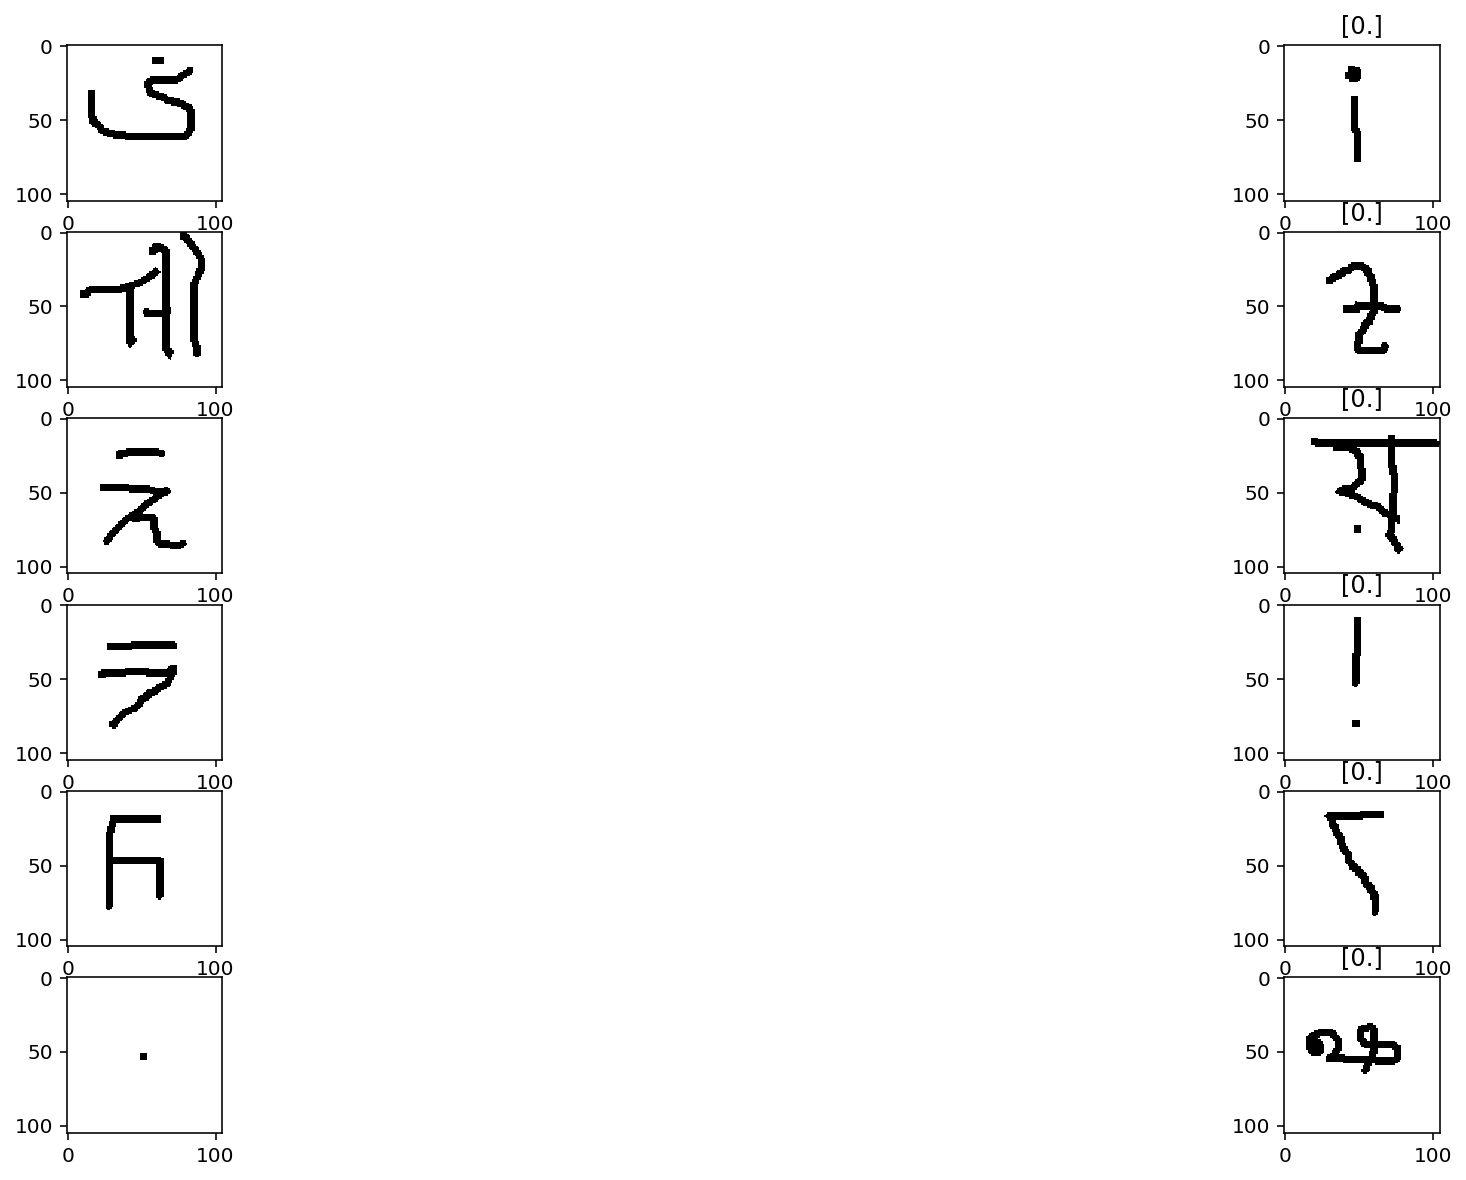

In [54]:
batch_size = 6
images,labels = next(generator(all_images,batch_size))
plt.figure(figsize=(20,10))
columns = 2
index = 1
for i, ims in enumerate(images):
    
    for im in ims:
        plt.subplot(batch_size, columns, index)
        plt.imshow(im,cmap='bone')
        index+=1
    plt.title(labels[i])